# Analyzing the Salary Expectation using Python
##### by Correy Ananta Adhilaksma: https://www.linkedin.com/in/correy-ananta-adhilaksma-6096a0105/

In this project, you are asked to predict whether someone's salary is IDR 7 million based on some information in the dataset columns. Create a classification model to determine the value in column 'salary' with the following conditions:
<ul>
    <li>0 : Salary <= IDR 7 million </li>
    <li>1 : Salary > IDR 7 million </li>
</ul>
Please download the train.csv file as training data, and use the test.csv file as test data that will be assessed on this project.

<b>Sanbercode Data Science 0620</b>

In [14]:
# data analysis 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [6]:
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')

# EDA (Explolatory Data Analaysis)

In [1302]:
train_df

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,46220,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
38389,33268,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
38390,44845,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
38391,4517,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0


In [1303]:
train_df.head(100)

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21648,69,?,168794,7th-8th,4,Menikah,?,Laki2,0.0,0.0,48.0,0
96,36888,56,Wiraswasta,67153,Doktor,16,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,60.0,1
97,21279,47,Pemerintah Lokal,183486,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,50.0,1
98,2817,41,Wiraswasta,237321,1st-4th,2,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,40.0,1


In [1068]:
test_df.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [1069]:
print(train_df.columns.values)

['id' 'Umur' 'Kelas Pekerja' 'Berat Akhir' 'Pendidikan'
 'Jmlh Tahun Pendidikan' 'Status Perkawinan' 'Pekerjaan' 'Jenis Kelamin'
 'Keuntungan Kapital' 'Kerugian Capital' 'Jam per Minggu' 'Gaji']


In [1070]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38393 non-null  int64  
 1   Umur                   38393 non-null  int64  
 2   Kelas Pekerja          38393 non-null  object 
 3   Berat Akhir            38393 non-null  int64  
 4   Pendidikan             38393 non-null  object 
 5   Jmlh Tahun Pendidikan  38393 non-null  int64  
 6   Status Perkawinan      38393 non-null  object 
 7   Pekerjaan              38393 non-null  object 
 8   Jenis Kelamin          38393 non-null  object 
 9   Keuntungan Kapital     38393 non-null  float64
 10  Kerugian Capital       38393 non-null  float64
 11  Jam per Minggu         38393 non-null  float64
 12  Gaji                   38393 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.8+ MB
________________________________________
<class '

In [1071]:
train_df.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
count,38393.000000,38393.000000,3.839300e+04,38393.000000,3.839300e+04,3.839300e+04,38393.000000,38393.000000
mean,24015.248535,38.673925,1.897238e+05,10.082828,1.518659e+07,1.212665e+06,40.440627,0.239497
std,13872.059919,13.694678,1.055764e+05,2.574543,1.044373e+08,5.613945e+06,12.382695,0.426782
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,11989.000000,28.000000,1.177510e+05,9.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
50%,24050.000000,37.000000,1.783850e+05,10.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
75%,36031.000000,48.000000,2.376300e+05,12.000000,0.000000e+00,0.000000e+00,45.000000,0.000000
max,47991.000000,90.000000,1.490400e+06,16.000000,1.399986e+09,6.098400e+07,99.000000,1.000000


In [1072]:
test_df.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
count,9599.000000,9599.000000,9.599000e+03,9599.000000,9.599000e+03,9.599000e+03,9599.000000
mean,23916.512033,38.447234,1.899967e+05,10.052610,1.489018e+07,1.252762e+06,40.330868
std,13783.179454,13.782397,1.064186e+05,2.548354,1.041154e+08,5.714041e+06,12.398919
min,2.000000,17.000000,1.376900e+04,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,12036.000000,28.000000,1.166200e+05,9.000000,0.000000e+00,0.000000e+00,40.000000
50%,23763.000000,37.000000,1.778580e+05,10.000000,0.000000e+00,0.000000e+00,40.000000
75%,35890.500000,48.000000,2.379975e+05,12.000000,0.000000e+00,0.000000e+00,45.000000
max,47983.000000,90.000000,1.455435e+06,16.000000,1.399986e+09,6.098400e+07,99.000000


In [1073]:
train_df.describe(include=['O'])

,Kelas Pekerja,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin
count,38393,38393,38393,38393,38393
unique,9,16,6,15,2
top,Wiraswasta,SMA,Menikah,Spesialis,Laki2
freq,26589,12430,17640,4911,25708


In [1074]:
test_df.describe(include=['O'])

,Kelas Pekerja,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin
count,9599,9599,9599,9599,9599
unique,9,16,6,15,2
top,Wiraswasta,SMA,Menikah,Perbaikan Kerajinan,Laki2
freq,6714,3090,4333,1205,6380


## Analyze by pivoting features

In [1249]:
train_df[['Kelas Pekerja', 'Gaji']].groupby(['Kelas Pekerja'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Kelas Pekerja,Gaji
2,Pekerja Bebas Perusahaan,0.553903
5,Pemerintah Provinsi,0.401596
3,Pemerintah Lokal,0.296251
1,Pekerja Bebas Bukan Perusahan,0.275716
4,Pemerintah Negara,0.271691
8,Wiraswasta,0.217270
6,Tanpa di Bayar,0.125000
0,?,0.097550
7,Tidak Pernah Bekerja,0.000000


In [1250]:
train_df[['Pendidikan', 'Gaji']].groupby(['Pendidikan'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Pendidikan,Gaji
15,Sekolah Professional,0.744745
9,Doktor,0.737945
10,Master,0.544673
14,Sarjana,0.414399
8,D4,0.260137
7,D3,0.257937
11,Pendidikan Tinggi,0.186540
13,SMA,0.157442
2,12th,0.074656
5,7th-8th,0.066482


In [1251]:
train_df[['Status Perkawinan', 'Gaji']].groupby(['Status Perkawinan'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Status Perkawinan,Gaji
4,Menikah,0.445238
5,Menikah LDR,0.113027
2,Cerai,0.101538
3,Janda,0.075552
1,Berpisah,0.071488
0,Belum Pernah Menikah,0.045771


In [1252]:
train_df[['Pekerjaan', 'Gaji']].groupby(['Pekerjaan'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Pekerjaan,Gaji
2,Ekesekutif Managerial,0.473695
11,Spesialis,0.450417
14,Tentara,0.363636
6,Penjaga,0.306540
13,Tech-support,0.291444
9,Sales,0.269026
7,Perbaikan Kerajinan,0.222431
12,Supir,0.206025
5,Pemuka Agama,0.142922
3,Mesin Inspeksi,0.129412


## Correlating Categorical features

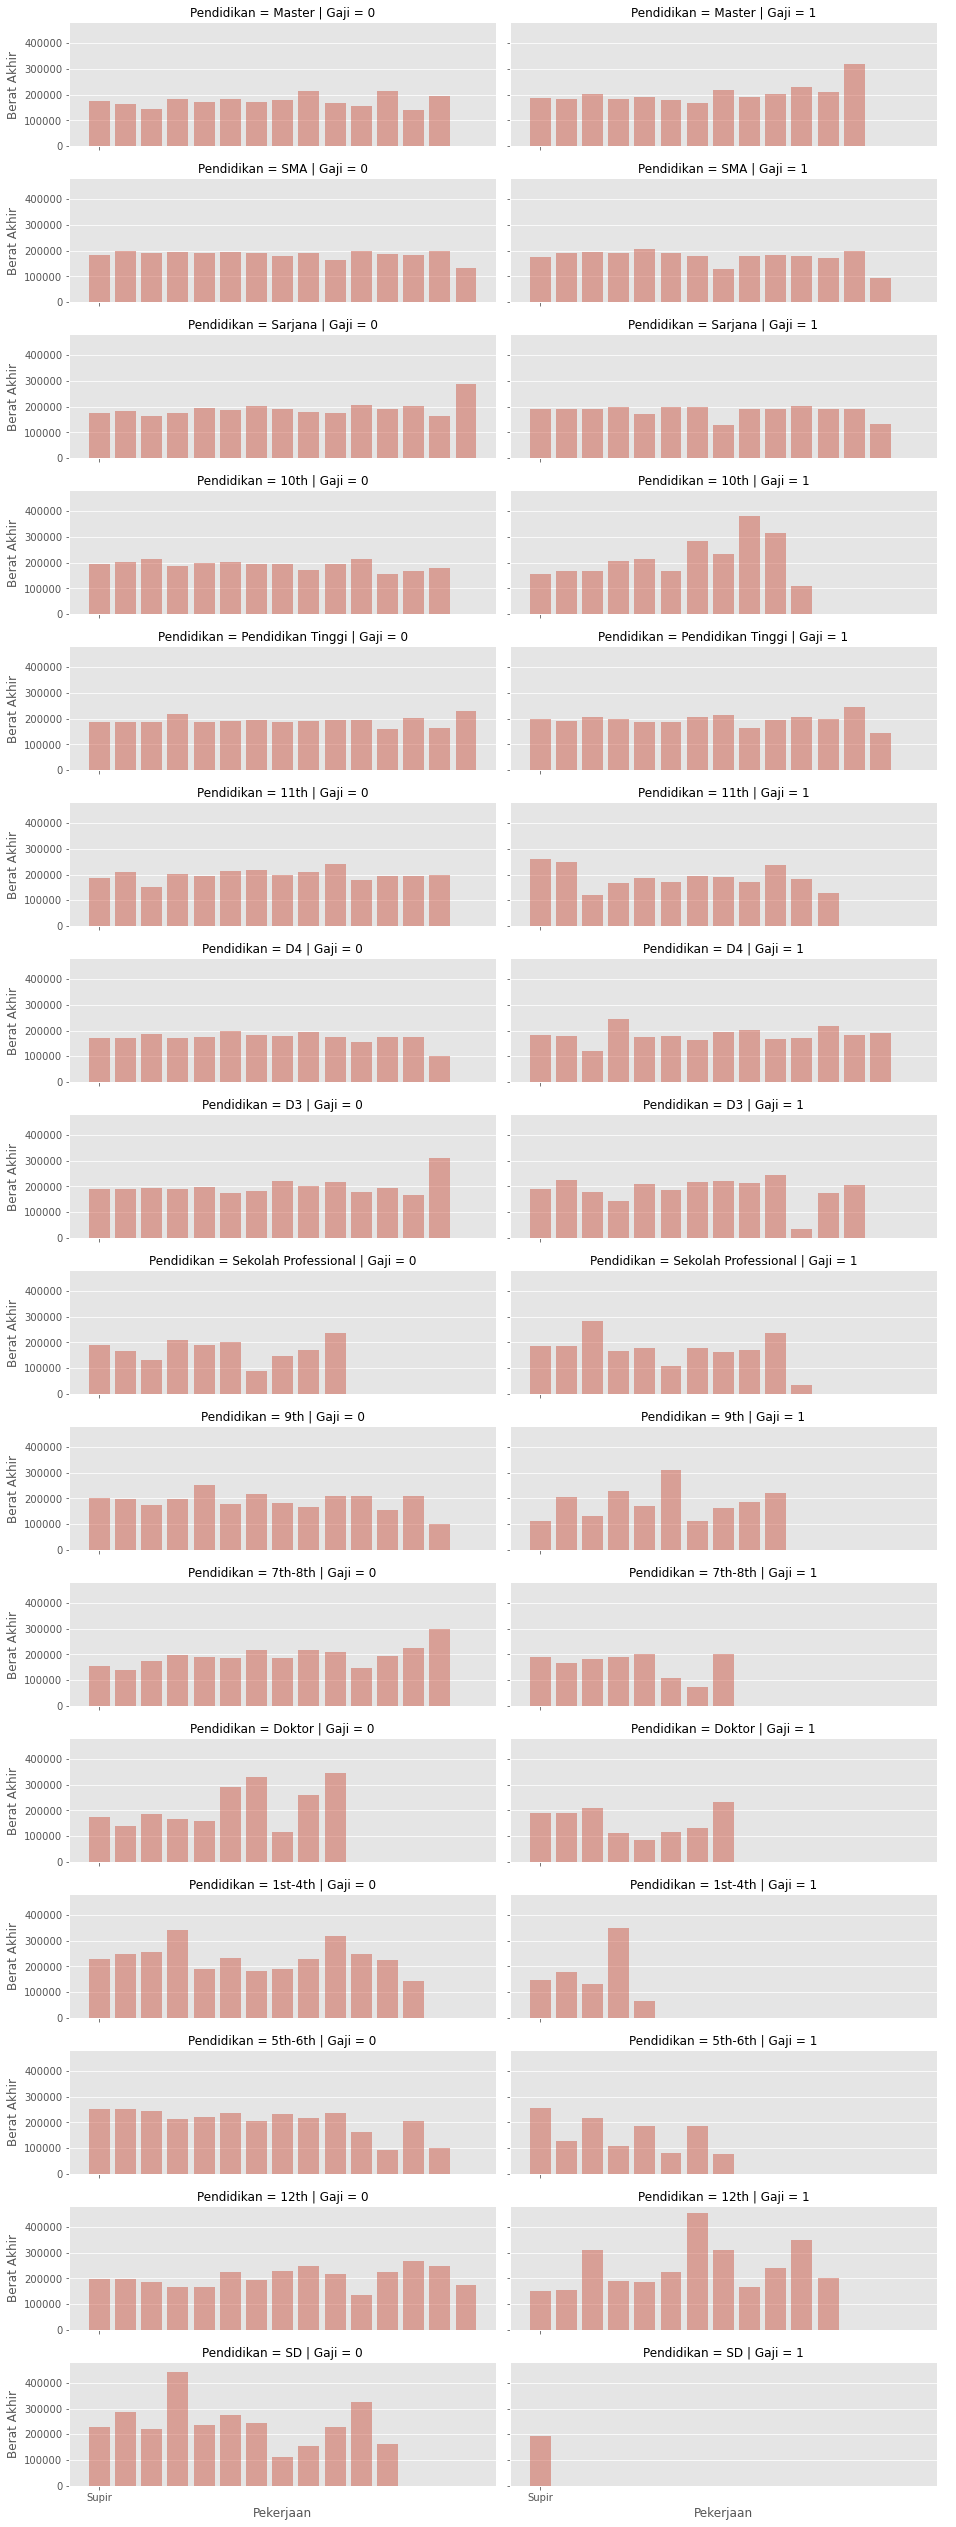

In [1261]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Pendidikan', col='Gaji', height=2.2, aspect=3)
grid.map(sns.barplot, 'Pekerjaan', 'Berat Akhir', alpha=.5, ci=None)
grid.add_legend()
plt.show()

# Visualisasi

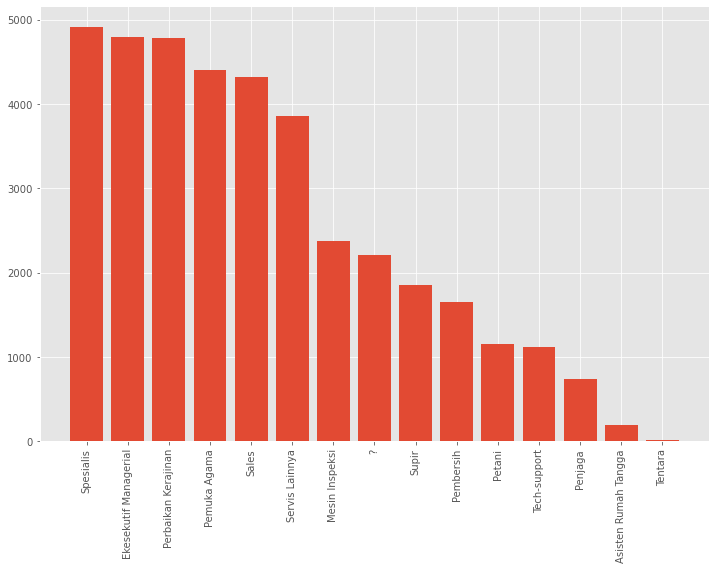

In [1075]:
# Visualisasi Pekerjaan              
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')

train_df = train_df['Pekerjaan'].value_counts()
category = train_df.index
frequency = train_df.values

#plot data
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(category, frequency)
ax.set_xticklabels(category, rotation =90)
plt.show()

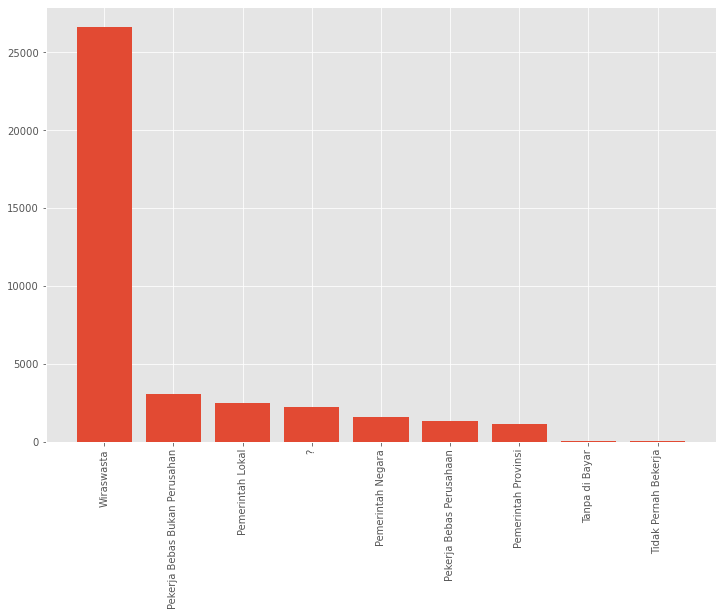

In [1076]:
# Visualisasi Kelas Pekerja
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')

train_df = train_df['Kelas Pekerja'].value_counts()
category = train_df.index
frequency = train_df.values

#plot data
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(category, frequency)
ax.set_xticklabels(category, rotation =90)
plt.show()

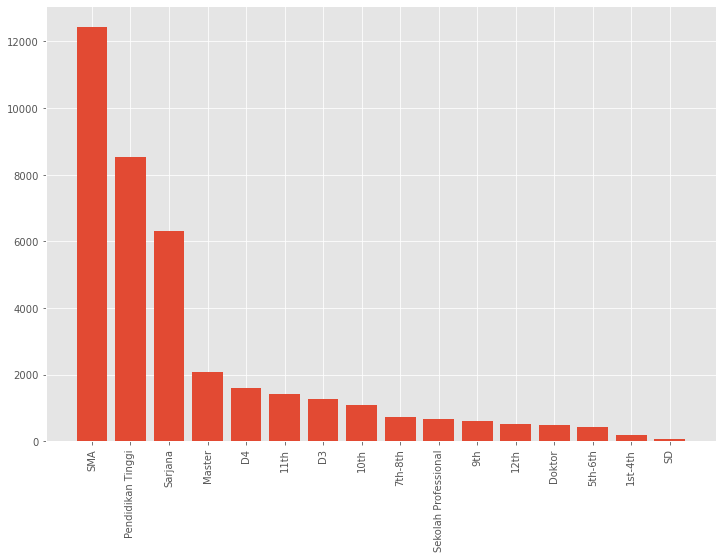

In [1077]:
# Visualisasi Pendidikan
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')

train_df = train_df['Pendidikan'].value_counts()
category = train_df.index
frequency = train_df.values

#plot data
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(category, frequency)
ax.set_xticklabels(category, rotation =90)
plt.show()

In [1078]:
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')
def bar_chart(feature):
    gaji_lebih_dari_5jt = train_df[train_df['Gaji']==1][feature].value_counts()
    gaji_kurang_dari_5jt = train_df[train_df['Gaji']==0][feature].value_counts()
    df = pd.DataFrame([gaji_lebih_dari_5jt, gaji_kurang_dari_5jt])
    df.index = ['gaji_lebih_dari_5jt','gaji_kurang_dari_5jt']
    df.plot(kind='barh',stacked=True, figsize=(16,8))    

Gaji > 5 jt :
 Wiraswasta                       5777
Pekerja Bebas Bukan Perusahan     847
Pekerja Bebas Perusahaan          745
Pemerintah Lokal                  727
Pemerintah Provinsi               453
Pemerintah Negara                 429
?                                 215
Tanpa di Bayar                      2
Name: Kelas Pekerja, dtype: int64

Gaji <= 5 jt: 
 Wiraswasta                       20812
Pekerja Bebas Bukan Perusahan     2225
?                                 1989
Pemerintah Lokal                  1727
Pemerintah Negara                 1150
Pemerintah Provinsi                675
Pekerja Bebas Perusahaan           600
Tanpa di Bayar                      14
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64


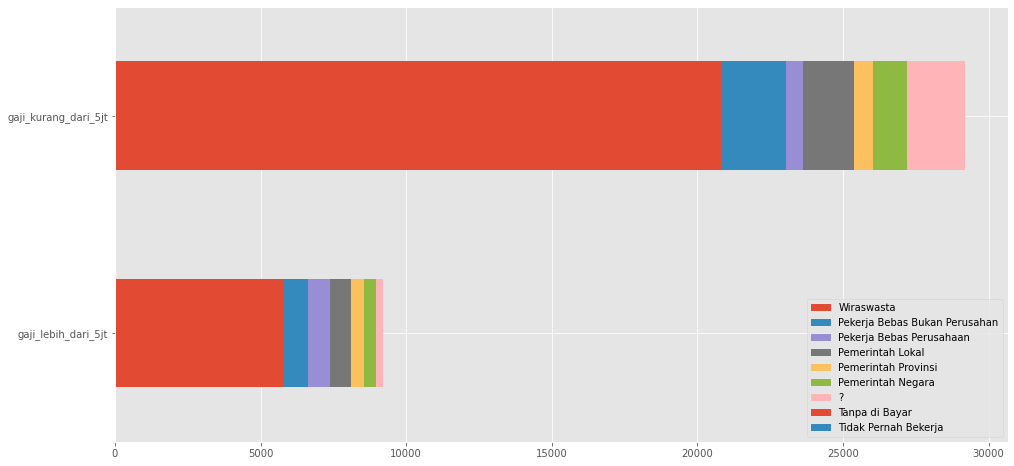

In [1079]:
bar_chart('Kelas Pekerja')
print("Gaji > 5 jt :\n",train_df[train_df['Gaji']==1]['Kelas Pekerja'].value_counts())
print("\nGaji <= 5 jt: \n",train_df[train_df['Gaji']==0]['Kelas Pekerja'].value_counts())

Gaji > 5 jt :
 Sarjana                 2619
SMA                     1957
Pendidikan Tinggi       1591
Master                  1140
Sekolah Professional     496
D4                       417
Doktor                   352
D3                       325
11th                      72
10th                      71
7th-8th                   48
9th                       38
12th                      38
5th-6th                   22
1st-4th                    8
SD                         1
Name: Pendidikan, dtype: int64

Gaji <= 5 jt: 
 SMA                     10473
Pendidikan Tinggi        6938
Sarjana                  3701
11th                     1335
D4                       1186
10th                     1025
Master                    953
D3                        935
7th-8th                   674
9th                       566
12th                      471
5th-6th                   396
1st-4th                   187
Sekolah Professional      170
Doktor                    125
SD                     

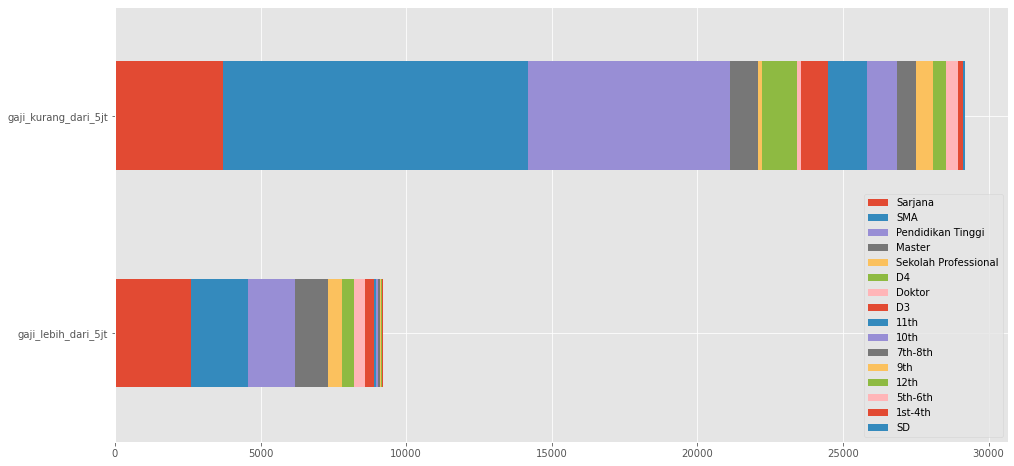

In [1080]:
bar_chart('Pendidikan')
print("Gaji > 5 jt :\n",train_df[train_df['Gaji']==1]['Pendidikan'].value_counts())
print("\nGaji <= 5 jt: \n",train_df[train_df['Gaji']==0]['Pendidikan'].value_counts())


Gaji > 5 jt :
 Menikah                 7854
Belum Pernah Menikah     579
Cerai                    528
Janda                     89
Berpisah                  86
Menikah LDR               59
Name: Status Perkawinan, dtype: int64

Gaji <= 5 jt: 
 Belum Pernah Menikah    12071
Menikah                  9786
Cerai                    4672
Berpisah                 1117
Janda                    1089
Menikah LDR               463
Name: Status Perkawinan, dtype: int64


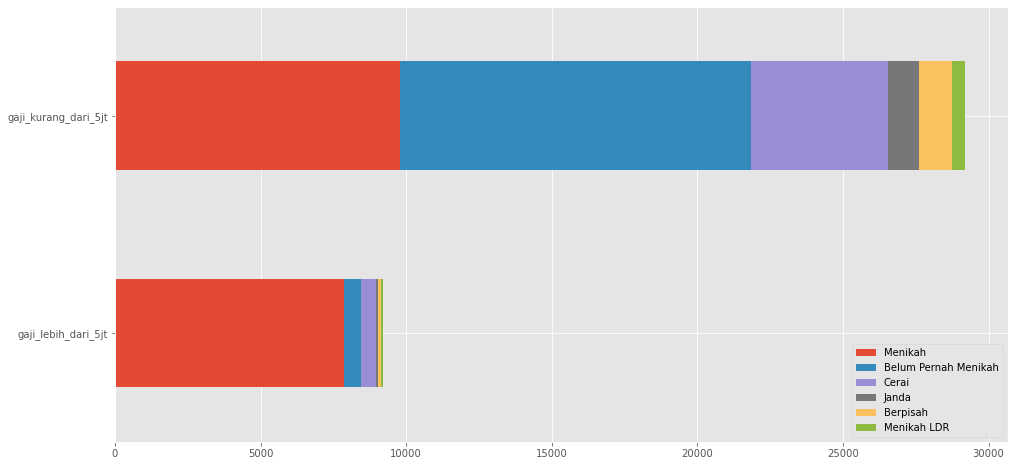

In [1081]:
bar_chart('Status Perkawinan')
print("Gaji > 5 jt :\n",train_df[train_df['Gaji']==1]['Status Perkawinan'].value_counts())
print("\nGaji <= 5 jt: \n",train_df[train_df['Gaji']==0]['Status Perkawinan'].value_counts())


Gaji > 5 jt :
 Ekesekutif Managerial    2269
Spesialis                2212
Sales                    1163
Perbaikan Kerajinan      1065
Pemuka Agama              630
Supir                     383
Tech-support              327
Mesin Inspeksi            308
Penjaga                   225
?                         215
Servis Lainnya            151
Petani                    132
Pembersih                 108
Tentara                     4
Asisten Rumah Tangga        3
Name: Pekerjaan, dtype: int64

Gaji <= 5 jt: 
 Pemuka Agama             3778
Perbaikan Kerajinan      3723
Servis Lainnya           3708
Sales                    3160
Spesialis                2699
Ekesekutif Managerial    2521
Mesin Inspeksi           2072
?                        1995
Pembersih                1542
Supir                    1476
Petani                   1018
Tech-support              795
Penjaga                   509
Asisten Rumah Tangga      195
Tentara                     7
Name: Pekerjaan, dtype: int64


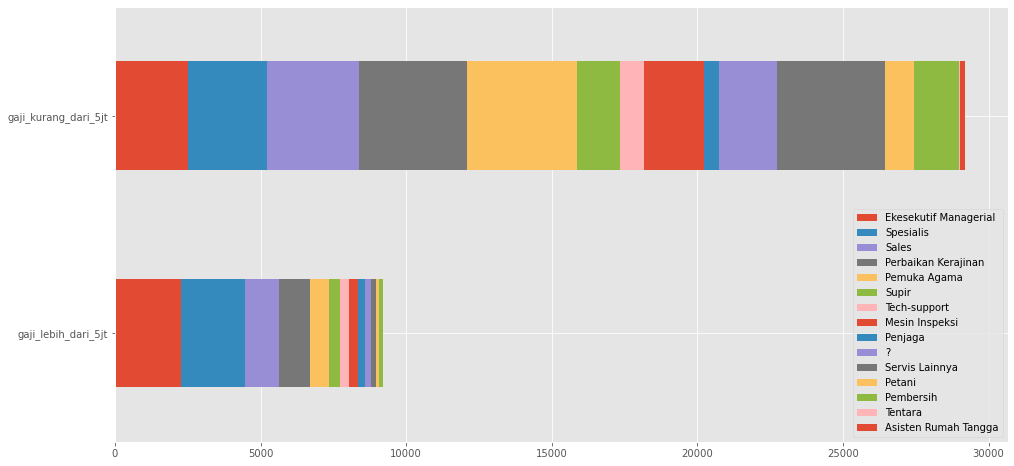

In [1082]:
bar_chart('Pekerjaan')
print("Gaji > 5 jt :\n",train_df[train_df['Gaji']==1]['Pekerjaan'].value_counts())
print("\nGaji <= 5 jt: \n",train_df[train_df['Gaji']==0]['Pekerjaan'].value_counts())

Gaji > 5 jt :
 Laki2        7786
Perempuan    1409
Name: Jenis Kelamin, dtype: int64

Gaji <= 5 jt: 
 Laki2        17922
Perempuan    11276
Name: Jenis Kelamin, dtype: int64


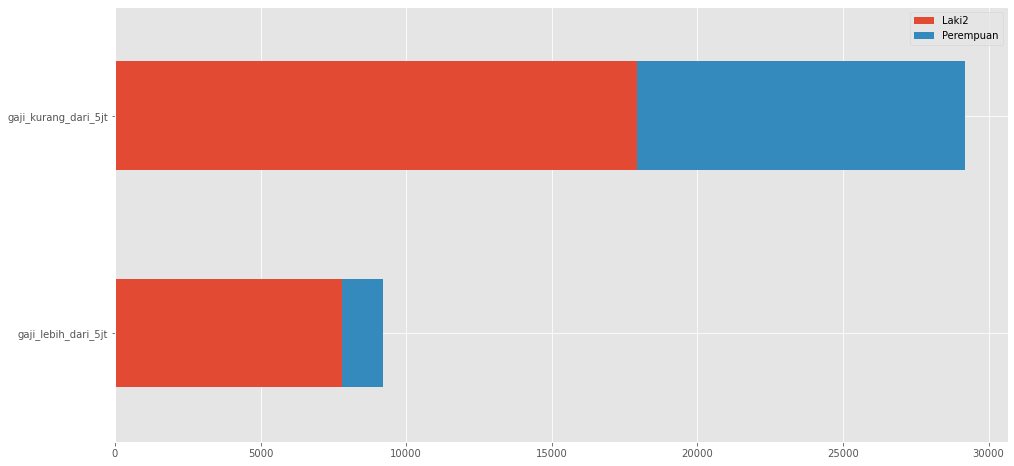

In [1083]:
bar_chart('Jenis Kelamin')
print("Gaji > 5 jt :\n",train_df[train_df['Gaji']==1]['Jenis Kelamin'].value_counts())
print("\nGaji <= 5 jt: \n",train_df[train_df['Gaji']==0]['Jenis Kelamin'].value_counts())

# Preprocessing Data

In [1084]:
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')

In [1085]:
count_nan = len(train_df) - train_df.count()
count_nan

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

In [1086]:
train_df['Pekerjaan'].value_counts()

Spesialis                4911
Ekesekutif Managerial    4790
Perbaikan Kerajinan      4788
Pemuka Agama             4408
Sales                    4323
Servis Lainnya           3859
Mesin Inspeksi           2380
?                        2210
Supir                    1859
Pembersih                1650
Petani                   1150
Tech-support             1122
Penjaga                   734
Asisten Rumah Tangga      198
Tentara                    11
Name: Pekerjaan, dtype: int64

In [1087]:
train_df['Kelas Pekerja'].value_counts()

Wiraswasta                       26589
Pekerja Bebas Bukan Perusahan     3072
Pemerintah Lokal                  2454
?                                 2204
Pemerintah Negara                 1579
Pekerja Bebas Perusahaan          1345
Pemerintah Provinsi               1128
Tanpa di Bayar                      16
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64

In [1088]:
train_df['Pendidikan'].value_counts()

SMA                     12430
Pendidikan Tinggi        8529
Sarjana                  6320
Master                   2093
D4                       1603
11th                     1407
D3                       1260
10th                     1096
7th-8th                   722
Sekolah Professional      666
9th                       604
12th                      509
Doktor                    477
5th-6th                   418
1st-4th                   195
SD                         64
Name: Pendidikan, dtype: int64

In [1089]:
train_df['Jmlh Tahun Pendidikan'].value_counts()

9     12430
10     8529
13     6320
14     2093
11     1603
7      1407
12     1260
6      1096
4       722
15      666
5       604
8       509
16      477
3       418
2       195
1        64
Name: Jmlh Tahun Pendidikan, dtype: int64

In [1090]:
train_df['Status Perkawinan'].value_counts()

Menikah                 17640
Belum Pernah Menikah    12650
Cerai                    5200
Berpisah                 1203
Janda                    1178
Menikah LDR               522
Name: Status Perkawinan, dtype: int64

In [1091]:
train_df['Jenis Kelamin'].value_counts()

Laki2        25708
Perempuan    12685
Name: Jenis Kelamin, dtype: int64

In [1092]:
train_df['Berat Akhir'].value_counts()

203488    17
126569    16
190290    16
186934    15
120277    14
          ..
43878      1
187240     1
332657     1
265074     1
208174     1
Name: Berat Akhir, Length: 24396, dtype: int64

In [1293]:
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')

In [1294]:
train_df['Keuntungan Kapital'].value_counts()

0.000000e+00    35191
2.103360e+08      399
1.076320e+08      316
1.021720e+08      294
1.399986e+09      192
                ...  
2.886800e+07        1
1.555400e+07        1
9.256800e+07        1
3.085600e+08        1
3.341800e+07        1
Name: Keuntungan Kapital, Length: 120, dtype: int64

In [1297]:
train_df[['Keuntungan Kapital', 'Gaji']].groupby(['Keuntungan Kapital'], as_index=False).mean().sort_values(by='Gaji', ascending=False)

,Keuntungan Kapital,Gaji
119,1.399986e+09,1.0
99,1.314040e+08,1.0
73,6.561800e+07,1.0
74,6.701800e+07,1.0
77,6.907600e+07,1.0
...,...,...
61,5.143600e+07,0.0
1,1.596000e+06,0.0
59,4.849600e+07,0.0
58,4.838400e+07,0.0


In [1295]:
train_df['Kerugian Capital'].value_counts()

0.0           36620
26628000.0      240
27678000.0      206
26418000.0      175
33810000.0       58
              ...  
30814000.0        1
31738000.0        1
34510000.0        1
24570000.0        1
26180000.0        1
Name: Kerugian Capital, Length: 96, dtype: int64

In [1296]:
train_df['Jam per Minggu'].value_counts()

40.0    17971
50.0     3324
45.0     2151
60.0     1696
35.0     1545
        ...  
74.0        1
81.0        1
89.0        1
91.0        1
95.0        1
Name: Jam per Minggu, Length: 95, dtype: int64

In [1095]:
train_df['Gaji'].value_counts()

0    29198
1     9195
Name: Gaji, dtype: int64

### delete unnecessary feature from dataset


In [1575]:
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')
train_test_data = [train_df, test_df]


In [1576]:
train_df.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


In [1577]:
# Droping beberapa features

print("Before", train_df.shape, test_df.shape, train_test_data[0].shape, train_test_data[1].shape)


train_df = train_df.drop(['id'], axis=1)
train_test_data = [train_df, test_df]

"After", train_df.shape, test_df.shape, train_test_data[0].shape, train_test_data[1].shape

Before (38393, 13) (9599, 12) (38393, 13) (9599, 12)


('After', (38393, 12), (9599, 12), (38393, 12), (9599, 12))

In [1578]:
train_df['AgeBand'] = pd.cut(train_df['Umur'], 5)
train_df[['AgeBand', 'Gaji']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Gaji
0,"(16.927, 31.6]",0.074519
1,"(31.6, 46.2]",0.317904
2,"(46.2, 60.8]",0.380378
3,"(60.8, 75.4]",0.246405
4,"(75.4, 90.0]",0.159722


In [1579]:
#Corverting Umur as a categorical feature
for dataset in train_test_data:
    dataset.loc[ dataset['Umur'] <= 31.6, 'Umur'] = 0,
    dataset.loc[(dataset['Umur'] > 31.6) & (dataset['Umur'] <= 46.2), 'Umur'] = 1,
    dataset.loc[(dataset['Umur'] > 46.2) & (dataset['Umur'] <= 60.8), 'Umur'] = 2,
    dataset.loc[(dataset['Umur'] > 60.8) & (dataset['Umur'] <= 75.4), 'Umur'] = 3,
    dataset.loc[ dataset['Umur'] > 75.4, 'Umur'] = 4
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,AgeBand
0,2,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1,"(46.2, 60.8]"
1,2,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0,"(46.2, 60.8]"
2,2,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1,"(46.2, 60.8]"
3,1,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0,"(31.6, 46.2]"
4,0,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1,"(16.927, 31.6]"


In [1580]:
train_df = train_df.drop(['AgeBand'], axis=1)
train_test_data = [train_df, test_df]
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,2,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,2,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,1,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,0,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


## Create new feature combining existing features

In [1581]:
train_df['utngBand'] = pd.cut(train_df['Keuntungan Kapital'],2 )
train_df[['utngBand', 'Gaji']].groupby(['utngBand'], as_index=False).mean().sort_values(by='utngBand', ascending=True)

,utngBand,Gaji
0,"(-1399986.0, 699993000.0]",0.235674
1,"(699993000.0, 1399986000.0]",1.000000


In [1582]:
#Corverting Umur as a categorical feature
for dataset in train_test_data:
    dataset.loc[ dataset['Keuntungan Kapital'] <= 0, 'Keuntungan Kapital'] = 0,
    dataset.loc[ dataset['Keuntungan Kapital'] > 0, 'Keuntungan Kapital'] = 1
    dataset['Keuntungan Kapital'] = dataset['Keuntungan Kapital'].astype(int)
train_df = train_df.drop(['utngBand'], axis=1)
train_test_data = [train_df, test_df]
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0,0.0,50.0,1
1,2,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0,0.0,38.0,0
2,2,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0,0.0,99.0,1
3,1,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0,0.0,40.0,0
4,0,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0,0.0,45.0,1


In [1583]:
train_df['rugiBand'] = pd.cut(train_df['Kerugian Capital'], 2)
train_df[['rugiBand', 'Gaji']].groupby(['rugiBand'], as_index=False).mean().sort_values(by='rugiBand', ascending=True)

,rugiBand,Gaji
0,"(-60984.0, 30492000.0]",0.237289
1,"(30492000.0, 60984000.0]",0.565891


In [1584]:
#Corverting Umur as a categorical feature
for dataset in train_test_data:
    dataset.loc[ dataset['Kerugian Capital'] < 0, 'Kerugian Capital'] = 0,
    dataset.loc[ dataset['Kerugian Capital'] > 0, 'Kerugian Capital'] = 1
    dataset['Kerugian Capital'] = dataset['Kerugian Capital'].astype(int)
train_df = train_df.drop(['rugiBand'], axis=1)
train_test_data = [train_df, test_df]
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0,0,50.0,1
1,2,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0,0,38.0,0
2,2,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0,0,99.0,1
3,1,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0,0,40.0,0
4,0,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0,0,45.0,1


In [1585]:
#Corverting Kelas Pekerja as a categorical feature
kelas_pekerja = {"Wiraswasta": 0, "Pekerja Bebas Bukan Perusahan": 0, "Pemerintah Lokal": 1, 
                 "Pemerintah Negara": 3, "Pekerja Bebas Perusahaan": 2, "Pemerintah Provinsi": 1, "Tanpa di Bayar": 4, "Tidak Pernah Bekerja":4 }

for dataset in train_test_data:
    dataset['Kelas Pekerja'] = dataset["Kelas Pekerja"].map(kelas_pekerja)


In [1586]:
train_df.head(50)

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3.0,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0,0,50.0,1
1,2,0.0,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0,0,38.0,0
2,2,0.0,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0,0,99.0,1
3,1,0.0,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0,0,40.0,0
4,0,0.0,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0,0,45.0,1
5,0,0.0,188793,SMA,9,Menikah,Sales,Laki2,0,0,35.0,0
6,2,0.0,106740,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0,0,40.0,1
7,2,NaN,141221,Sarjana,13,Menikah,?,Laki2,0,1,25.0,0
8,0,0.0,216889,SMA,9,Belum Pernah Menikah,Pembersih,Laki2,0,0,40.0,0
9,1,NaN,112584,SMA,9,Berpisah,?,Perempuan,0,0,40.0,0


In [1587]:
count_nan = len(train_df) - train_df.count()
count_nan

Umur                        0
Kelas Pekerja            2204
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                   0
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

In [1588]:
train_df['Kelas Pekerja'] = train_df['Kelas Pekerja'].fillna(method='ffill').astype(int)
test_df['Kelas Pekerja'] = test_df['Kelas Pekerja'].fillna(method='ffill').astype(int)
train_test_data = [train_df, test_df]
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0,0,50.0,1
1,2,0,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0,0,38.0,0
2,2,0,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0,0,99.0,1
3,1,0,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0,0,40.0,0
4,0,0,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0,0,45.0,1


In [1589]:
# Corverting Pendidikan as a categorical feature
tingkat_pendidikan = {"1st-4th": 0, "5th-6th": 0, "7th-8th": 0, 
                 "9th": 0, "10th": 0, "11th": 0, "12th": 0, "SD": 0, "SMA": 1, "D3": 2, "D4":2, "Sarjana":3,"Master":3,"Doktor":3,
                 "Pendidikan Tinggi":3,"Sekolah Professional":2 }

for dataset in train_test_data:
    dataset['Pendidikan'] = dataset["Pendidikan"].map(tingkat_pendidikan).astype(int)
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,139616,3,14,Menikah,Ekesekutif Managerial,Laki2,0,0,50.0,1
1,2,0,158993,1,9,Cerai,Servis Lainnya,Perempuan,0,0,38.0,0
2,2,0,284648,1,9,Cerai,Ekesekutif Managerial,Perempuan,0,0,99.0,1
3,1,0,132847,1,9,Belum Pernah Menikah,Pembersih,Perempuan,0,0,40.0,0
4,0,0,103432,1,9,Belum Pernah Menikah,Supir,Laki2,0,0,45.0,1


In [1590]:
# Corverting Jmlh Tahun Pendidikan as a categorical feature
for dataset in train_test_data:
    dataset.loc[ dataset['Jmlh Tahun Pendidikan'] <= 5, 'Jmlh Tahun Pendidikan'] = 0,
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] > 5) & (dataset['Jmlh Tahun Pendidikan'] <= 10), 'Jmlh Tahun Pendidikan'] = 1,
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] > 10) & (dataset['Jmlh Tahun Pendidikan'] <= 15), 'Jmlh Tahun Pendidikan'] = 2,
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] > 15) & (dataset['Jmlh Tahun Pendidikan'] <= 20), 'Jmlh Tahun Pendidikan'] = 3,
    dataset.loc[ dataset['Jmlh Tahun Pendidikan'] > 20, 'Jmlh Tahun Pendidikan'] = 4

In [1591]:
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,139616,3,2,Menikah,Ekesekutif Managerial,Laki2,0,0,50.0,1
1,2,0,158993,1,1,Cerai,Servis Lainnya,Perempuan,0,0,38.0,0
2,2,0,284648,1,1,Cerai,Ekesekutif Managerial,Perempuan,0,0,99.0,1
3,1,0,132847,1,1,Belum Pernah Menikah,Pembersih,Perempuan,0,0,40.0,0
4,0,0,103432,1,1,Belum Pernah Menikah,Supir,Laki2,0,0,45.0,1


In [1592]:
# Corverting Status Perkawinan as a categorical feature
perkawinan = {"Menikah": 0, "Belum Pernah Menikah": 1, "Cerai": 2, "Berpisah": 3, "Janda" : 4, "Menikah LDR":0}
for dataset in train_test_data:
    dataset['Status Perkawinan'] = dataset['Status Perkawinan'].map(perkawinan).astype(int)


In [1593]:
# Corverting Pekerjaan as a categorical feature
pekerjaan = {"Tentara": 4, "Asisten Rumah Tangga": 1, "Penjaga": 1, 
            "Tech-support": 2, "Petani": 4, "Pembersih": 1, "Supir": 1,"Mesin Inspeksi":2, 
             "Servis Lainnya":2, "Sales":3, "Pemuka Agama":4,
            "Perbaikan Kerajinan":2,"Ekesekutif Managerial":3, "Spesialis":3, }

for dataset in train_test_data:
    dataset['Pekerjaan'] = dataset["Pekerjaan"].map(pekerjaan)

In [1594]:
count_nan = len(train_df) - train_df.count()
count_nan

Umur                        0
Kelas Pekerja               0
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                2210
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

In [1595]:
train_df['Pekerjaan'] = train_df['Pekerjaan'].fillna(method='ffill').astype(int)
test_df['Pekerjaan'] = test_df['Pekerjaan'].fillna(method='ffill').astype(int)
train_test_data = [train_df, test_df]
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,139616,3,2,0,3,Laki2,0,0,50.0,1
1,2,0,158993,1,1,2,2,Perempuan,0,0,38.0,0
2,2,0,284648,1,1,2,3,Perempuan,0,0,99.0,1
3,1,0,132847,1,1,1,1,Perempuan,0,0,40.0,0
4,0,0,103432,1,1,1,1,Laki2,0,0,45.0,1


In [1596]:
sex_mapping = {"Laki2": 0, "Perempuan": 1}
for dataset in train_test_data:
    dataset['Jenis Kelamin'] = dataset['Jenis Kelamin'].map(sex_mapping).astype(int)

In [1597]:
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,139616,3,2,0,3,0,0,0,50.0,1
1,2,0,158993,1,1,2,2,1,0,0,38.0,0
2,2,0,284648,1,1,2,3,1,0,0,99.0,1
3,1,0,132847,1,1,1,1,1,0,0,40.0,0
4,0,0,103432,1,1,1,1,0,0,0,45.0,1


In [1598]:
train_df['JamBand'] = pd.cut(train_df['Jam per Minggu'], 5)
train_df[['JamBand', 'Gaji']].groupby(['JamBand'], as_index=False).mean().sort_values(by='JamBand', ascending=True)

,JamBand,Gaji
0,"(0.902, 20.6]",0.066667
1,"(20.6, 40.2]",0.189892
2,"(40.2, 59.8]",0.394695
3,"(59.8, 79.4]",0.412379
4,"(79.4, 99.0]",0.347418


In [1599]:
for dataset in train_test_data:
    dataset.loc[dataset['Jam per Minggu'] <= 20.6, 'Jam per Minggu'] = 0,
    dataset.loc[(dataset['Jam per Minggu'] > 20.6) & (dataset['Jam per Minggu'] <= 40.2), 'Jam per Minggu'] = 1,
    dataset.loc[(dataset['Jam per Minggu'] > 40.2) & (dataset['Jam per Minggu'] <= 59.8), 'Jam per Minggu'] = 2,
    dataset.loc[(dataset['Jam per Minggu'] > 59.8) & (dataset['Jam per Minggu'] <= 79.4), 'Jam per Minggu'] = 3,
    dataset.loc[dataset['Jam per Minggu'] > 79.4, 'Jam per Minggu'] = 4
    dataset['Jam per Minggu'] = dataset['Jam per Minggu'].astype(int)

train_df = train_df.drop(['JamBand'], axis=1)
train_test_data = [train_df, test_df]
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,139616,3,2,0,3,0,0,0,2,1
1,2,0,158993,1,1,2,2,1,0,0,1,0
2,2,0,284648,1,1,2,3,1,0,0,4,1
3,1,0,132847,1,1,1,1,1,0,0,1,0
4,0,0,103432,1,1,1,1,0,0,0,2,1


In [1600]:
train_df['BatasBand'] = pd.cut(train_df['Berat Akhir'], 5)
train_df[['BatasBand', 'Gaji']].groupby(['BatasBand'], as_index=False).mean().sort_values(by='BatasBand', ascending=True)

,BatasBand,Gaji
0,"(10806.885, 307908.0]",0.239083
1,"(307908.0, 603531.0]",0.244204
2,"(603531.0, 899154.0]",0.198529
3,"(899154.0, 1194777.0]",0.150000
4,"(1194777.0, 1490400.0]",0.166667


In [1601]:
for dataset in train_test_data:
    dataset.loc[dataset['Berat Akhir'] <= 307908, 'Berat Akhir'] = 0,
    dataset.loc[(dataset['Berat Akhir'] > 307908) & (dataset['Berat Akhir'] <= 603531), 'Berat Akhir'] = 1,
    dataset.loc[(dataset['Berat Akhir'] > 603531) & (dataset['Berat Akhir'] <= 899154), 'Berat Akhir'] = 2,
    dataset.loc[(dataset['Berat Akhir'] > 899154) & (dataset['Berat Akhir'] <= 1194777), 'Berat Akhir'] = 3,
    dataset.loc[dataset['Berat Akhir'] > 1194777, 'Berat Akhir'] = 4
    dataset['Berat Akhir'] = dataset['Berat Akhir'].astype(int)
    
train_df = train_df.drop(['BatasBand'], axis=1)
train_test_data = [train_df, test_df]
train_df.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,0,3,2,0,3,0,0,0,2,1
1,2,0,0,1,1,2,2,1,0,0,1,0
2,2,0,0,1,1,2,3,1,0,0,4,1
3,1,0,0,1,1,1,1,1,0,0,1,0
4,0,0,0,1,1,1,1,0,0,0,2,1


In [1602]:
train_df.head(50)

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,2,3,0,3,2,0,3,0,0,0,2,1
1,2,0,0,1,1,2,2,1,0,0,1,0
2,2,0,0,1,1,2,3,1,0,0,4,1
3,1,0,0,1,1,1,1,1,0,0,1,0
4,0,0,0,1,1,1,1,0,0,0,2,1
5,0,0,0,1,1,0,3,0,0,0,1,0
6,2,0,0,1,1,0,2,0,0,0,1,1
7,2,0,0,3,2,0,2,0,0,1,1,0
8,0,0,0,1,1,1,1,0,0,0,1,0
9,1,0,0,1,1,3,1,1,0,0,1,0


In [1603]:
test_df.head(50)

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,0,1,0,2,2,2,4,1,0,0,1
1,44213,0,0,0,1,1,0,2,0,0,0,2
2,20823,1,1,0,3,1,0,4,0,0,0,1
3,40565,2,0,1,3,1,0,3,0,0,1,1
4,9860,0,0,0,3,1,1,3,1,0,1,1
5,26493,2,0,0,3,1,0,4,0,1,0,1
6,24739,0,0,0,0,1,1,1,0,0,0,0
7,3470,3,0,0,0,1,0,3,0,0,0,1
8,27029,2,0,0,1,1,2,3,0,1,0,2
9,7402,0,0,0,2,2,0,3,0,0,0,3


In [1604]:
count_nan = len(train_df) - train_df.count()
count_nan

Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

In [1607]:
train_df.to_csv('Train_pendapatan1.csv', index = False)
test_df.to_csv('Test_pendapatan1.csv',index = False)

# Correcting Data

In [120]:
train_df=pd.read_csv('Train_pendapatan2.csv')
test_df=pd.read_csv('Test_pendapatan2.csv')

X_train = train_df.drop("Gaji",axis=1)
Y_train = train_df["Gaji"]
X_test  = test_df.drop('id',  axis=1).copy()
y_test = test_df["id"]
X_train.shape, Y_train.shape, X_test.shape

((38393, 11), (38393,), (9599, 11))

In [1745]:
Y_train

0        1
1        0
2        1
3        0
4        1
        ..
38388    0
38389    1
38390    1
38391    0
38392    1
Name: Gaji, Length: 38393, dtype: int64

In [1743]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1689]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(100,5000,20), 'weights':['distance', 'uniform']}


rscvknn = RandomizedSearchCV (modelknn, param_grid, scoring='roc_auc',cv=10)
rscvknn.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([ 100,  120,  140,  160,  180,  200,  220,  240,  260,  280,  300,
        320,  340,  360,  380,  400,  420,  440,  460,  480,...
       4060, 4080, 4100, 4120, 4140, 4160, 4180, 4200, 4220, 4240, 4260,
       4280, 4300, 4320, 4340, 4360, 4380, 4400, 4420, 4440, 4460, 4480,
       4500, 4520, 4540, 4560, 4580, 4600, 4620, 4640, 4660, 4680, 4700,
       4720, 4740, 4760, 4780, 4800, 4820, 4840, 4860, 4880,

In [1692]:
rscvknn.best_score_

0.8761376129185405

In [1693]:
rscvknn.best_params_

{'weights': 'uniform', 'n_neighbors': 460}

In [1679]:
from sklearn.tree import DecisionTreeClassifier
modeltree = DecisionTreeClassifier()

param_gridtree = {'criterion':['gini','entropy'],'splitter':['best','random'],
                 'max_depth' : np.arange(1,3),
                 'min_samples_split': np.arange (5,3000 ,20),
                 'max_features' : np.arange (1,3)}
                  #class weight untuk data inbalance karena data kita seperti itu
rscvtree = RandomizedSearchCV(modeltree, param_gridtree, n_iter =50, scoring='roc_auc', cv=10)
rscvtree.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [1680]:
rscvtree.best_score_

0.7387526616797668

In [1681]:
rscvtree.best_params_

{'splitter': 'best',
 'min_samples_split': 2745,
 'max_features': 2,
 'max_depth': 2,
 'criterion': 'entropy'}

In [1670]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

param_gridtree = {'criterion':['gini','entropy'],
                 'max_depth' : np.arange(1,3),
                 'min_samples_split': np.arange (2,3000 ,20)}
                  #class weight untuk data inbalance karena data kita seperti itu
rscvran = RandomizedSearchCV(random_forest, param_gridtree, scoring='roc_auc', cv=10)
rscvran.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [1673]:
rscvran.best_score_

0.8765307605320827

In [1674]:
rscvran.best_params_

{'min_samples_split': 2342, 'max_depth': 2, 'criterion': 'gini'}

## Model 

In [168]:
train_df=pd.read_csv('Train_pendapatan2.csv')
test_df=pd.read_csv('Test_pendapatan2.csv')

X_train = train_df.drop("Gaji",axis=1)
Y_train = train_df["Gaji"]
X_test  = test_df.drop('id',  axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((38393, 11), (38393,), (9599, 11))

In [169]:
X_train

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,59,5,139616,12,14,4,2,0,0,0,50
1,52,8,158993,8,9,2,10,1,0,0,38
2,52,1,284648,8,9,2,2,1,0,0,99
3,45,8,132847,8,9,0,4,1,0,0,40
4,28,8,103432,8,9,0,12,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...
38388,47,1,148169,8,9,4,7,0,0,0,40
38389,69,2,264722,9,12,4,9,0,0,0,40
38390,24,1,31606,11,13,4,11,1,0,0,20
38391,47,8,197836,8,9,4,9,0,0,0,45


In [170]:
Y_train

0        1
1        0
2        1
3        0
4        1
        ..
38388    0
38389    1
38390    1
38391    0
38392    1
Name: Gaji, Length: 38393, dtype: int64

In [171]:
X_test

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,30,3,99761,10,11,2,5,1,0,0,40
1,28,8,202206,8,9,4,3,0,0,0,50
2,34,4,199934,14,10,4,5,0,0,0,40
3,51,8,373448,14,10,4,2,0,0,28028000,40
4,20,0,144685,14,10,0,0,1,0,22428000,40
...,...,...,...,...,...,...,...,...,...,...,...
9594,58,5,159021,3,5,4,8,0,0,0,40
9595,45,1,144086,5,7,4,7,0,0,0,50
9596,20,8,238685,14,10,0,10,1,0,0,32
9597,41,3,249039,8,9,1,5,1,0,0,40


## Stochastic Gradient Descent (SGD):

In [172]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.96

## Gaussian Naive Bayes:

In [173]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_predgas = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.49

## Perceptron:

In [174]:
perceptron = Perceptron(max_iter=25)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.97

## Logistic regression

In [175]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.59

In [176]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
9,Jam per Minggu,4.878924e-08
8,Kerugian Capital,2.280345e-08
7,Keuntungan Kapital,-1.676942e-11
5,Pekerjaan,-4.138893e-11
1,Berat Akhir,-2.230223e-10
6,Jenis Kelamin,-2.320784e-10
4,Status Perkawinan,-3.073914e-10
3,Jmlh Tahun Pendidikan,-3.073992e-10
0,Kelas Pekerja,-1.188214e-09
10,Gaji,-1.265546e-09


## SVC

In [177]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

80.23

## Linear Support Vector Machine:

In [178]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\adhi_\miniconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


29.91

## KNeighborsClassifier

In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 460, weights = 'uniform' )
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.12

In [180]:
from sklearn.model_selection import cross_val_score
cvs_score = cross_val_score(knn, X_test,Y_pred, cv=20, scoring='roc_auc' )
cvs_score.mean()

0.9882738066088121

## DecisionTreeClassifier

In [181]:
decision_tree = DecisionTreeClassifier(criterion= 'entropy', splitter = 'best',  min_samples_split= 2745,)
decision_tree.fit(X_train, Y_train)
Y_predtree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.49

In [182]:
#cross validasi roc auc
from sklearn.model_selection import cross_val_score
cvs_score = cross_val_score(decision_tree, X_test,Y_predtree, cv=20, scoring='roc_auc' )
cvs_score.mean()

0.925986050616765

## RandomForestClassifier

In [183]:
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=2465, criterion= 'gini')
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.04

In [184]:
from sklearn.model_selection import cross_val_score
cvs_score = cross_val_score(random_forest, X_test,Y_pred, cv=20, scoring='roc_auc' )
cvs_score.mean()

0.9945695503796591

In [185]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_test,Y_pred, cv=20, scoring='accuracy' )
scores.mean()


0.8934281489213639

## Which is the best Model ?

In [186]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
85.49,Decision Tree
85.04,Random Forest
81.12,KNN
79.59,Logistic Regression
79.49,Naive Bayes
77.97,Perceptron
77.96,Stochastic Gradient Decent
29.91,Support Vector Machines


## K-Fold Cross Validation:

In [187]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85416667 0.85963542 0.85       0.84970044 0.85230529 0.85438916
 0.84970044 0.84839802 0.85777546 0.85595207]
Mean: 0.8532022974190328
Standard Deviation: 0.0036175289819742134


### Feature Importance

In [188]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Status Perkawinan,0.325
Keuntungan Kapital,0.221
Jmlh Tahun Pendidikan,0.170
Umur,0.089
Pendidikan,0.073
Jam per Minggu,0.047
Kerugian Capital,0.038
Jenis Kelamin,0.024
Pekerjaan,0.009


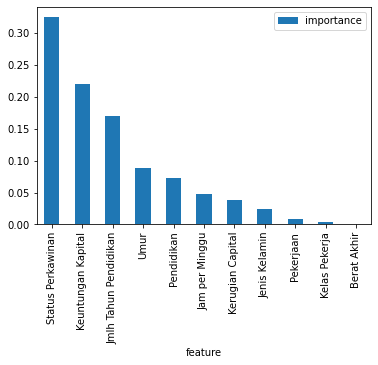

In [189]:
importances.plot.bar()

In [190]:
# Training random forest again:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.99 %


In [191]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 85.22 %


## Hyperparameter Tuning

In [ ]:
#Operasiny mencapai 35 jam jagn di run lagi

In [254]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=1,
                                   

In [255]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'n_estimators': 1500}

In [256]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 35,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 86.58 %


In [247]:
tree=DecisionTreeClassifier(criterion='gini',
                            min_samples_leaf= 5, 
                            splitter='random',
                            min_samples_split = 5,
                            max_depth=3,
                            random_state= 5)
tree.fit(X_train,Y_train)

y_predtrees=tree.predict(X_test)

acc_decision_tree2 = round(tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree2

79.76

In [225]:
DecisionTreeClassifier?

In [248]:
y_predtrees

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## Further Evaluation

In [193]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[27376,  1822],
       [ 3484,  5711]], dtype=int64)

In [194]:
#Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7581308907473782
Recall: 0.6210984230560087


In [195]:
#F-Score
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.6828072692491631

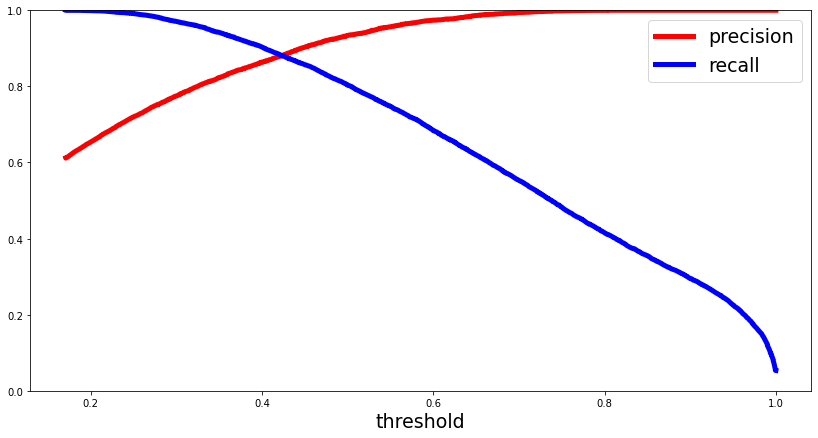

In [196]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

## ROC AUC Curve

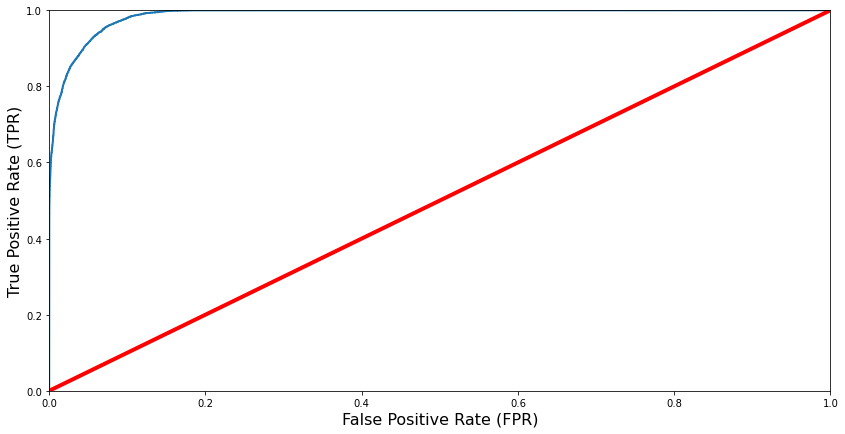

In [197]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [198]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.987730434805605


In [199]:

#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(7,4,2))
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)
acc_ann=round(mlp.score(X_train,Y_train)*100,2)
acc_ann

76.05

In [257]:
submission = pd.DataFrame({
        "Id": test_df["id"],
        "Gaji": Y_prediction
    })
submission.to_csv('Pendapatan Submissiontest 4.csv', index=False)

In [258]:
# Submission yang di input tadi, Hasil skor 0.72716

In [259]:
df = pd.read_csv('Pendapatan Submissiontest 4.csv')
df

,Id,Gaji
0,47933,0
1,44213,0
2,20823,0
3,40565,1
4,9860,0
...,...,...
9594,13587,0
9595,33231,0
9596,18614,0
9597,37566,0


In [260]:
df['Gaji'].value_counts()

0    7820
1    1779
Name: Gaji, dtype: int64

In [74]:
# Hasil skor 0.71165

In [935]:
df1 = pd.read_csv('Pendapatan Submission4.csv')
df1

,Id,Gaji
0,47933,0
1,44213,0
2,20823,1
3,40565,1
4,9860,0
...,...,...
9594,13587,0
9595,33231,0
9596,18614,0
9597,37566,0


In [936]:
df1['Gaji'].value_counts()

0    7554
1    2045
Name: Gaji, dtype: int64

In [994]:
# Submission yang di input tadi, Hasil skor 0.71385
df2 = pd.read_csv('Pendapatan Submission5.csv')
df2

,Id,Gaji
0,47933,0
1,44213,0
2,20823,1
3,40565,1
4,9860,0
...,...,...
9594,13587,0
9595,33231,0
9596,18614,0
9597,37566,0


In [995]:
df2['Gaji'].value_counts()

0    7607
1    1992
Name: Gaji, dtype: int64

In [59]:
dftest = pd.read_csv('Pendapatan Submissiontest.csv')
dftest.head(1000)

,Id,Gaji
0,47933,0
1,44213,0
2,20823,1
3,40565,1
4,9860,0
...,...,...
995,3639,1
996,16163,0
997,12948,1
998,44275,0


In [60]:
dftest['Gaji'].value_counts()

0    7756
1    1843
Name: Gaji, dtype: int64

In [830]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Umur                   38393 non-null  int64  
 1   Kelas Pekerja          38393 non-null  int32  
 2   Berat Akhir            38393 non-null  int64  
 3   Pendidikan             38393 non-null  int32  
 4   Jmlh Tahun Pendidikan  38393 non-null  int64  
 5   Status Perkawinan      38393 non-null  int32  
 6   Pekerjaan              38393 non-null  int32  
 7   Jenis Kelamin          38393 non-null  int32  
 8   Jam per Minggu         38393 non-null  float64
 9   Gaji                   38393 non-null  int64  
dtypes: float64(1), int32(5), int64(4)
memory usage: 2.2 MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  --